<center><h1 class="list-group-item list-group-item-success">Twitter Sentiment Analysis</h1></center>

### Name : M Sathishkumar

### Email: klmsathishkumar@gmail.com

### Topic : NLP (Sentiment Classification)

### TMLC Fellowship Program

<img src = "https://res.cloudinary.com/qna/image/upload/v1635170410/sentiment-points.a502b2c_pyfy2i.png" width = 500>

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>Problem Statement</font></h4>
    </strong>
</div><br>
<font size = 3.9 color = "brown">Classify the tweets by implementing any NLP approach for Sentiment analysis on the provided dataset. The objective is to recognize whether the given tweet is oriented as negative (-1), neutral (0), or positive (1) tone. Focus majorly on unique preprocessing techniques.</font>




<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>Context</font></h4>
    </strong>
</div><br>
<font size = 3.9 color = "brown">Sentiment analysis studies the subjective information in an expression, that is, the opinions, appraisals, emotions, or attitudes towards a topic, person or entity.The dataset has three sentiments namely, negative(-1), neutral(0), and positive(+1).</font>

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>Data Overview</font></h4>
    </strong>
</div><br>
<font size = 3.5 color = "brown">The dataset contains information about<br><br>
    <font color = "red">
        <ol>
    <li>Tweet - Message Tweeted</li><br>
    <li>label - Sentiment for the tweet</li>
        </ol>
    </font>
</font>


<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>Contents</font></h4>
    </strong>
</div>
<font size = 3.5 color = "blue">
    <ol>
    <br><br><li>Importing Packages</li><br>
    <li>Importing Data</li><br>
    <li>Analysing Data</li><br>
        <ol> <font color = "red">
            <li> Data Overview</li>
            <li> Checking for NA</li>
            <li> Finding out Distribution of different sentiments </li>
            </font></ol><br>
    <li>Data Visualization</li><br>
        <ol> <font color = "red">
            <li> Distribution of different sentiments</li>
            <li> Word cloud on different sentiments</li>
            </font></ol><br>
    <li>Data Preprocessing</li><br>
        <ol> <font color = "red">
            <li> Tokenization</li>
            <li> Removing unnecessary punctuation, tags</li>
            <li>Converting all letters to lower case</li>
            <li>Stemming</li>
            </font></ol><br>
    <li>Feature Extraction</li><br>
         <ol> <font color = "red">
            <li> Bag of words</li>
            <li> TF-IDF Vectorizer</li>
            </font></ol><br>
    <li>Training Models</li><br>
         <ol> <font color = "red">
            <li>Naive Bayes</li>
            <li>Logistic Regression</li>
            </font></ol><br>
    <li>Evaluation Metrics</li><br>
    <li>Sequential Modelling</li><br>
    <li>Predictions</li><br>
    </ol>
</font>

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>1. Importing Packages</font></h4>
    </strong>
</div>

In [4]:
# Importing Packages
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import urllib.request
import re
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from gensim.models import Word2Vec
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,Input,SpatialDropout1D, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow import keras
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>2. Importing Data</font></h4>
    </strong>
</div>

In [5]:
# Reading Data
df = pd.read_csv('../input/twitter-sentiment-dataset/Twitter_Data.csv')

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>3. Analysing Data</font></h4>
    </strong>
</div>


In [6]:
# Data Sample
df.sample(5)

,clean_text,category
161321,ragamodi our primeministerhes promoting indiay...,0.0
25096,modis lakhs will never comerahuls 6000 per mon...,1.0
133120,director web series narendra modi worries will...,0.0
156870,but modi ’ lies are always the same “hindu kha...,0.0
140261,not from the congress terrorist\n,0.0


In [7]:
# Checking for NA Values
df.isnull().sum()

clean_text    4
category      7
dtype: int64

<font color = "brown" size = 4> Very Less NA Values😊. We can drop them</font>

In [8]:
# Distribution of different classes in sentiment
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
count_values_in_column(df,"category")

,Total,Percentage
1.0,72250,44.33
0.0,55213,33.88
-1.0,35510,21.79
NaN,7,0.00


<img src = "https://res.cloudinary.com/qna/image/upload/v1635400115/Screenshot_2021-10-28_111801_uf1rfy.png">

In [9]:
# Segrating based on different sentiments
df_negative = df[df["category"]==-1]
df_positive = df[df["category"]==1]
df_neutral = df[df["category"]==0]

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>4. Data Visualization</font></h4>
    </strong>
</div>


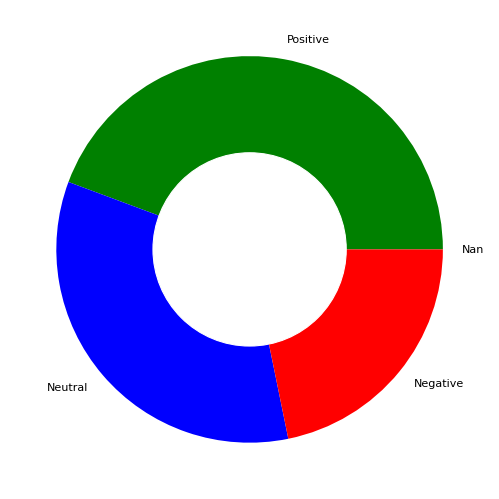

In [10]:
# create data for Pie Chart
plt.figure(figsize=(13, 8), dpi=80)
pichart = count_values_in_column(df,"category")
names= ["Positive","Neutral","Negative","Nan"]
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['green','blue','red',"yellow"])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [11]:
# Function to Create Wordcloud
def create_wordcloud(text,path):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    max_words=3000,
    stopwords=stopwords,
    random_state=42,
    width=900, height=500,
    repeat=True)
    wc.generate(str(text))
    wc.to_file(path)
    print("Word Cloud Saved Successfully")
    path=path
    display(Image.open(path))

### Parameters of wordcloud function<br>
<font color = "brown" size = 3.5>
<li>background_color = Color of background</li><br>
<li>max_words = The maximum number of unique words used</li><br>
<li>stopwords = stopword list</li><br>
<li>max_font_size = Maximum font size</li><br>
<li>random_state = To ensure that random numbers are generated in the</li><br>
<li>same order, so the results will be the same even if generated several times</li><br>
<li>width = width size of the output</li><br>
<li>height = height size of the output</li><br></font>

Word Cloud Saved Successfully


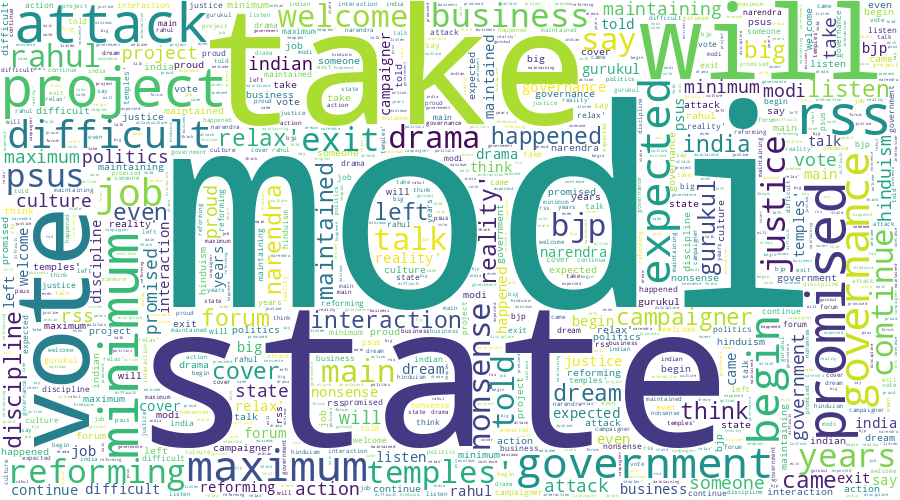

<Figure size 1200x640 with 0 Axes>

In [12]:
# Wordcloud for all tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df['clean_text'].values,"all.png")

Word Cloud Saved Successfully


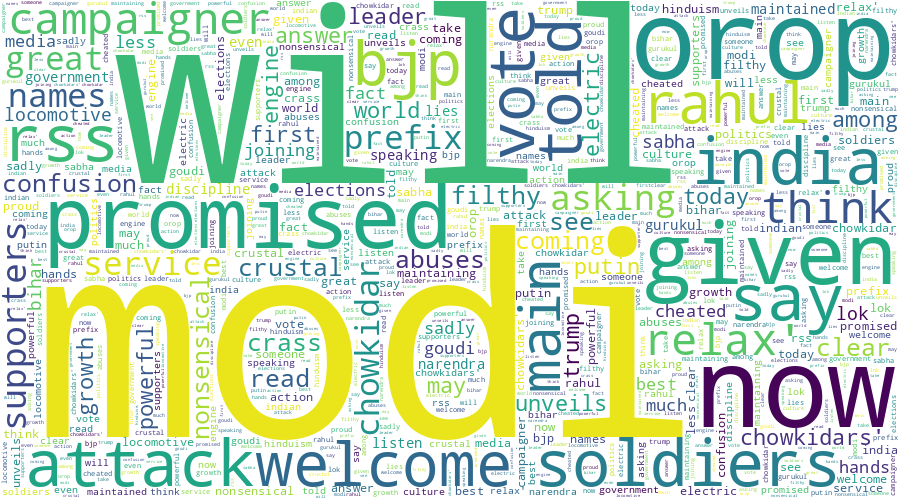

<Figure size 1200x640 with 0 Axes>

In [13]:
# Wordcloud for only positive tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_positive['clean_text'].values,"positive.png")

Word Cloud Saved Successfully


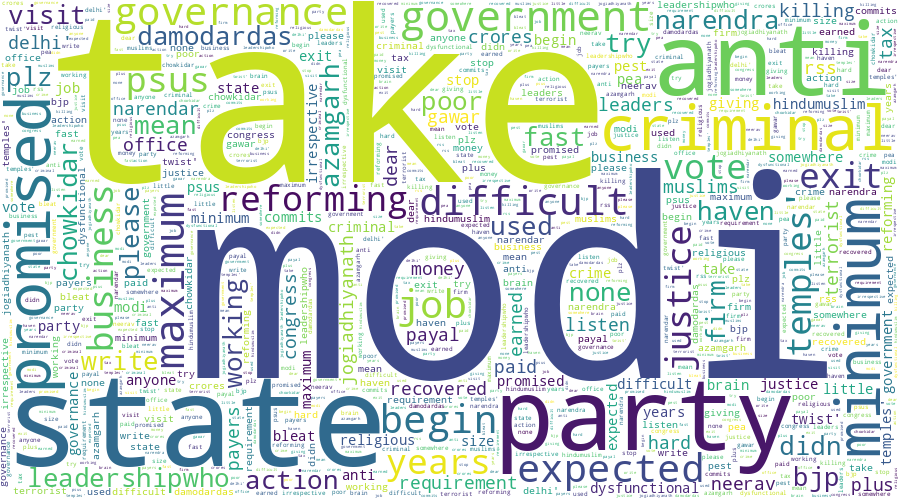

<Figure size 1200x640 with 0 Axes>

In [14]:
# Wordcloud for only negative tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_negative['clean_text'].values,"negative.png")

Word Cloud Saved Successfully


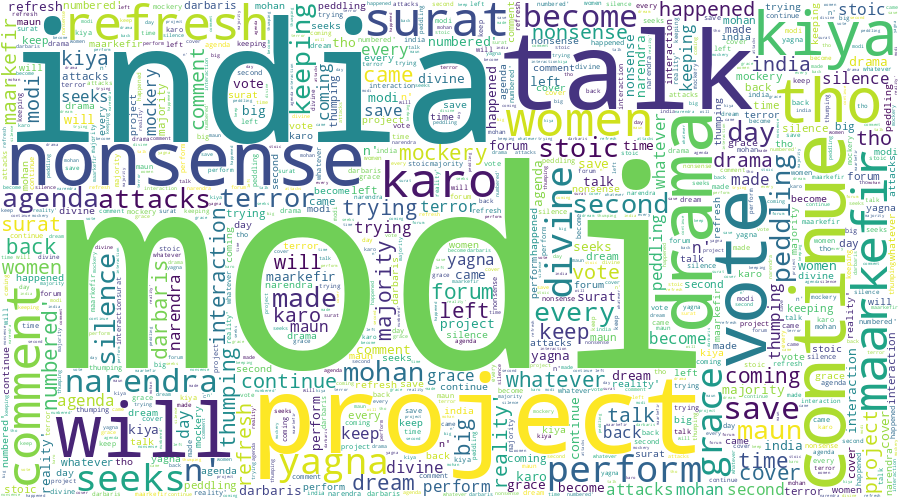

<Figure size 1200x640 with 0 Axes>

In [15]:
# Wordcloud for only neutral tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_neutral['clean_text'].values,"neutral.png")

<img src = "https://res.cloudinary.com/qna/image/upload/v1635400201/Screenshot_2021-10-28_111951_pjyaew.png">

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>5. Data Preprocessing</font></h4>
    </strong>
</div>


<img src = "https://res.cloudinary.com/qna/image/upload/v1635400248/Screenshot_2021-10-28_112037_jmuu5a.png">

In [16]:
# Stemming
ps = PorterStemmer()
# Initializing Lists
corpus = []
words = []
for i in range(0, len(df)):
    # Removing characters other than letters
    review = re.sub('[^a-zA-Z]', ' ', str(df["clean_text"][i]))
    # Lowering the case all the text
    review = review.lower()
    # Splitting into words
    review = review.split()
    # Applying Stemming
    stemmed = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    # Joining words
    review = ' '.join(stemmed)
    # Appending all tweets to a list after preprocessing
    corpus.append(review)
    # Appending all words for word embeddings
    words.append(stemmed)

In [17]:
# Corpus sample
corpus[1:10]

['talk nonsens continu drama vote modi',
 'say vote modi welcom bjp told rahul main campaign modi think modi relax',
 'ask support prefix chowkidar name modi great servic confus read crustal clear crass filthi nonsens see abus come chowkidar',
 'answer among power world leader today trump putin modi may',
 'kiya tho refresh maarkefir comment karo',
 'surat women perform yagna seek divin grace narendra modi becom',
 'come cabinet scholar like modi smriti hema time introspect',
 'upcom elect india saga go import pair look current modi lead govt elect deal brexit combin weekli look juici bear imho',
 'gandhi gay modi']

In [18]:
# Length 
print("Legth of Corpus:",len(corpus))

Legth of Corpus: 162980


In [19]:
# Updating created corpus in our dataframe
df["clean_text"] = corpus

In [20]:
# Dropping NA Values and resetting index
df = df.dropna()
df = df.reset_index()

In [21]:
# Checking for NA Values after corpus updations
df.isna().sum()

index         0
clean_text    0
category      0
dtype: int64

In [22]:
# Exporting stemmed sentences
df[["clean_text","category"]].to_csv("stemmed.csv",index = False)

In [23]:
# Loading the stemmed sentences
df_stemmed = pd.read_csv("stemmed.csv")
# Extracting corpus
corpus = list(df_stemmed["clean_text"])

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>6. Feature Extraction</font></h4>
    </strong>
</div>


<img src = "https://res.cloudinary.com/qna/image/upload/v1635400362/Screenshot_2021-10-28_112233_vjokaq.png">

<img src = "https://res.cloudinary.com/qna/image/upload/v1635400421/Screenshot_2021-10-28_112331_lfqb85.png">

In [24]:
# Applying TFIDF Vectorization
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X_tfidf = tfidf.fit_transform(corpus).toarray()

In [25]:
# Independent Variable
X = df_stemmed["clean_text"]
# Dependent Varible
Y=df_stemmed["category"]

In [26]:
df_tfidf = pd.DataFrame(X_tfidf,columns = tfidf.get_feature_names())
df_tfidf["output"] = Y
df_tfidf.head()


,aadhaar,aadhar,aaj,aam,aap,aayega,aayog,abdullah,abe,abhi,...,youngster,your,youth,youtub,youv,yr,yr modi,zee,zero,output
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>7. Data Modelling</font></h4>
    </strong>
</div>


In [27]:
# Train test Split
X_train_tfidf,X_test_tfidf,Y_train_tfidf,Y_test_tfidf = train_test_split(X_tfidf,Y,test_size=0.33,random_state = 27)

### Multinomial Naive Bayes

In [28]:
# Initializing Model
classfier_tfidf = MultinomialNB(alpha=0.1)
# Fitting data
classfier_tfidf.fit(X_train_tfidf,Y_train_tfidf)
# Prediction on test data
Y_pred_tfidf = classfier_tfidf.predict(X_test_tfidf)

### Logistic Regression

In [31]:
# Initializing Model
logistic_tfidf = LogisticRegression(solver='liblinear')
# Fitting data
logistic_tfidf.fit(X_train_tfidf,Y_train_tfidf)
# Prediction on test data
Y_pred_logistic_tfidf = logistic_tfidf.predict(X_test_tfidf)

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>8. Evaluation Metrics</font></h4>
    </strong>
</div>


In [32]:
acc_log_tfidf = accuracy_score(Y_test_tfidf,Y_pred_logistic_tfidf)
classification_log_tfidf = classification_report(Y_test_tfidf,Y_pred_logistic_tfidf)
confusion_matrix_log_tfidf = confusion_matrix(Y_test_tfidf,Y_pred_logistic_tfidf)

In [33]:
print("For Logistic Regression: \n")
print(" \n Accuracy : ",acc_log_tfidf,"\n","Classification report \n",classification_log_tfidf,"\n","Confusion matrix \n",confusion_matrix_log_tfidf)

For Logistic Regression: 

 
 Accuracy :  0.8318109943261092 
 Classification report 
               precision    recall  f1-score   support

        -1.0       0.82      0.69      0.75     11800
         0.0       0.80      0.91      0.85     18201
         1.0       0.87      0.84      0.86     23754

    accuracy                           0.83     53755
   macro avg       0.83      0.81      0.82     53755
weighted avg       0.83      0.83      0.83     53755
 
 Confusion matrix 
 [[ 8117  1747  1936]
 [  549 16534  1118]
 [ 1214  2477 20063]]


<font color = "brown" size = 4><b>For Logistic Regression, we get 83% Accuracy with liblinear as a solver</b></font> 

In [34]:
acc_tfidf = accuracy_score(Y_test_tfidf,Y_pred_tfidf)
classification_tfidf = classification_report(Y_test_tfidf,Y_pred_tfidf)
confusion_matrix_tfidf = confusion_matrix(Y_test_tfidf,Y_pred_tfidf)

In [35]:
print("For Mutinomial Naive Bayes: \n")
print(" \n Accuracy : ",acc_tfidf,"\n","Classification report \n",classification_tfidf,"\n","Confusion matrix \n",confusion_matrix_tfidf)

For Mutinomial Naive Bayes: 

 
 Accuracy :  0.7062040740396243 
 Classification report 
               precision    recall  f1-score   support

        -1.0       0.78      0.46      0.58     11800
         0.0       0.76      0.65      0.70     18201
         1.0       0.66      0.87      0.75     23754

    accuracy                           0.71     53755
   macro avg       0.73      0.66      0.68     53755
weighted avg       0.72      0.71      0.70     53755
 
 Confusion matrix 
 [[ 5471  1607  4722]
 [  553 11843  5805]
 [  964  2142 20648]]


<font color = "brown" size = 4><b>For Mutinomail NB, we get 70% Accuracy with alpha = 0.1</b></font> 

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>9. Sequential Modelling</font></h4>
    </strong>
</div>


<img src = "https://res.cloudinary.com/qna/image/upload/v1635400546/Screenshot_2021-10-28_112538_othd8n.png">
    <img src = "https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png"><font>

In [36]:
# Cloning tweets
messages=X.copy()

In [37]:
# Setting parameter for padding and sequential modelling
voc_size = 5000
embedding_vector_features = 200
sent_length = 200
lstm_out = 128

In [38]:
# Tokenization of all words in the vocabulary for all tweets
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr[1:3]

[[4154, 948, 1594, 953, 2269, 3142],
 [4733,
  2269,
  3142,
  1802,
  2837,
  3629,
  2241,
  1112,
  2917,
  3142,
  2909,
  3142,
  2524]]

In [39]:
# Applying Post Padding
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[3142 4201 2447 ...    0    0    0]
 [4154  948 1594 ...    0    0    0]
 [4733 2269 3142 ...    0    0    0]
 ...
 [1624 3555 4757 ...    0    0    0]
 [ 182 3921 4902 ...    0    0    0]
 [ 522 1786 4715 ...    0    0    0]]


In [40]:
# Changing Negative values to positive
Y = [2 if x == -1 else x for x in Y]

# Converting list to arrays
X_final=np.array(embedded_docs)
y_final=np.array(Y)

In [41]:
# Shape of X,Y
X_final.shape,y_final.shape

((162893, 200), (162893,))

In [42]:
# Train Test Split
X_train_embed, X_test_embed, Y_train_embed, Y_test_embed = train_test_split(X_final, y_final, test_size=0.33, random_state=27)

In [43]:
# Sequential Model
model = Sequential()

# Input layer
model.add(Input(shape=(None,)))

# Embedding layer
model.add(Embedding(voc_size, embedding_vector_features, input_length = sent_length))

# LSTM layer
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2)))

# Fully connected layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))

# Output layer
model.add(Dense(3, activation = 'softmax'))

# model.summary()
model.summary()


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               336896    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 1,378,243
Trainable params: 1,378,243
Non-trainable params: 0
______________________________________________

In [44]:
# Compling model and running
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train_embed,Y_train_embed,validation_data=(X_test_embed,Y_test_embed),
                    epochs=2, batch_size=256,
                    verbose=1,shuffle=True)

2021-10-28 05:22:04.356889: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2
427/427 [==============================] - 736s 2s/step - loss: 0.6785 - accuracy: 0.7186 - val_loss: 0.5531 - val_accuracy: 0.7837
Epoch 2/2
427/427 [==============================] - 732s 2s/step - loss: 0.5307 - accuracy: 0.7960 - val_loss: 0.5395 - val_accuracy: 0.7881


<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>10. Predictions</font></h4>
    </strong>
</div>


In [46]:
predictions = model.predict(X_test_embed)
print(history.history)

{'loss': [0.6784818768501282, 0.5306609869003296], 'accuracy': [0.7185856699943542, 0.7959647178649902], 'val_loss': [0.5531380772590637, 0.5394888520240784], 'val_accuracy': [0.7836852669715881, 0.7880755066871643]}


## Hurray!! We got 78% Accuracy 😁 <br><br>
<center><img src = "https://c.tenor.com/2Px7xeNIBswAAAAM/mr-bean-magic.gif"></center><br>

## Thank you